x with abnormal point: [10 11 12 13 14 15 16 17 18 19]
y with abnormal point: [23.84553639 26.37430807 27.84664703 27.99965383 32.61851188 33.88982371
 34.9776809  36.05141065 39.26196624 39.27242136]


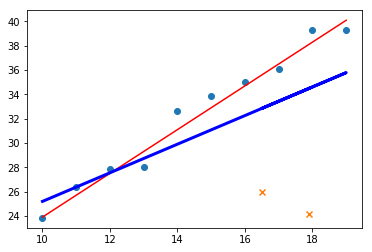

In [1]:
# 数据集存在异常点时，线性回归器的拟合效果不好，“被异常点带到沟里去了”
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(37) # 使得每次运行得到的随机数都一样
x=np.arange(10,20) # 自变量，随便定义的

error=np.random.normal(size=x.shape)
y=1.8*x+5.9+error # 添加随机数作为噪音
# print('x={}'.format(x))
# print('noise y={}'.format(y))
# print('target y={}'.format(1.8*x+5.9))

plt.scatter(x,y)
plt.plot(x,1.8*x+5.9,'-r') # 绘制的是红色的直线

# 以下加入两个异常点，再用线性回归器进行拟合
abnormal_x=[16.5,17.9]
abnormal_y=[25.98,24.12]
print('x with abnormal point: {}'.format(x))
print('y with abnormal point: {}'.format(y))

# 将异常点绘制出来
plt.scatter(abnormal_x,abnormal_y,marker='x')

# 将异常点加入到原数据集中，构建线性回归器进行拟合，绘制拟合直线
whole_x=np.append(x,abnormal_x).reshape(-1,1)
whole_y=np.append(y,abnormal_y).reshape(-1,1)

from sklearn import linear_model
linear_regressor=linear_model.LinearRegression() # 创建线性回归器对象
linear_regressor.fit(whole_x,whole_y) # 使用训练数据集训练该回归器对象
# 查看拟合结果
y_predict=linear_regressor.predict(whole_x) 
plt.plot(whole_x,y_predict,'-b',linewidth=3)

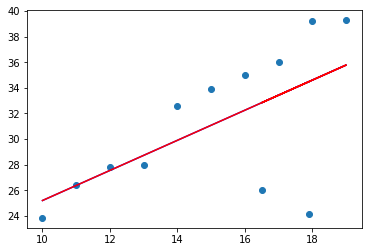

In [2]:
# 岭回归器的构建
from sklearn import linear_model
ridge_regressor=linear_model.Ridge(alpha=0.02,fit_intercept=True,max_iter=10000)
# 构建岭回归器对象，使用的偏差系数为alpha=0.02
ridge_regressor.fit(whole_x,whole_y) # 使用岭回归器进行训练

# 使用训练完成的岭回归器预测数值
y_train_predict=ridge_regressor.predict(whole_x)
plt.scatter(whole_x,whole_y)
plt.plot(whole_x,y_predict,'-b')
plt.plot(whole_x,y_train_predict,'-r')

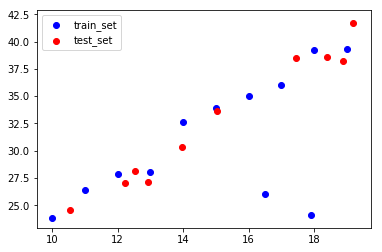

In [3]:
# 岭回归器模型的评估

# 第一步：构建评估数据，即test set
test_x=np.arange(10,20) # 自变量，随便定义的
shift=np.random.normal(size=test_x.shape)
test_x=test_x+shift # 对test_x进行偏置得到测试集的X

error=np.random.normal(size=x.shape)
test_y=1.8*test_x+5.9+error # 添加随机数作为噪音
plt.scatter(whole_x,whole_y,color='blue',label='train_set')
plt.scatter(test_x,test_y,color='red',label='test_set')
plt.legend()
# 把train set和test set都绘制到一个图中，可以看出偏差不大

In [4]:
# 第二步：使用test set计算MSE
y_test_predict=ridge_regressor.predict(test_x.reshape(-1,1))

# 第三步：使用评价指标来评估模型的好坏
import sklearn.metrics as metrics
test_y=test_y.reshape(-1,1)
print('平均绝对误差：{}'.format(
    round(metrics.mean_absolute_error(y_test_predict,test_y),2)))
print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(y_test_predict,test_y),2)))
print('中位数绝对误差：{}'.format(
    round(metrics.median_absolute_error(y_test_predict,test_y),2)))
print('解释方差分：{}'.format(
    round(metrics.explained_variance_score(y_test_predict,test_y),2)))
print('R方得分：{}'.format(
    round(metrics.r2_score(y_test_predict,test_y),2)))

平均绝对误差：2.29
均方误差MSE：8.32
中位数绝对误差：2.0
解释方差分：0.53
R方得分：0.33


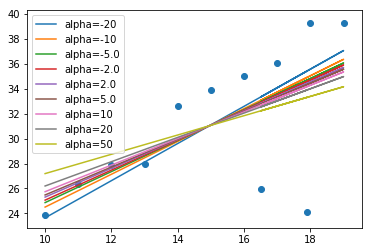

In [5]:
# 对岭回归器模型进行优化，主要优化alpha的取值
alpha_candidates=[-20,-10,-5.0,-2.0,2.0,5.0,10,20,50]

from sklearn import linear_model
for alpha in alpha_candidates:
    ridge_regressor=linear_model.Ridge(alpha=alpha,fit_intercept=True,max_iter=10000)
    # 构建岭回归器对象，使用不同的alpha值
    ridge_regressor.fit(whole_x,whole_y) # 使用岭回归器进行训练
    # 使用训练完成的岭回归器预测数值
    y_train_predict=ridge_regressor.predict(whole_x)
    plt.plot(whole_x,y_train_predict,label='alpha='+str(alpha))
    
plt.legend() 
plt.scatter(whole_x,whole_y)

In [6]:
# 对岭回归器模型进行优化，使用不同alpha值优化后得到的模型计算测试集
alpha_candidates=[-20,-10,-5.0,-2.0,2.0,5.0,10,20,50]

from sklearn import linear_model
for alpha in alpha_candidates:
    ridge_regressor=linear_model.Ridge(alpha=alpha,fit_intercept=True,max_iter=10000)
    # 构建岭回归器对象，使用不同的alpha值
    ridge_regressor.fit(whole_x,whole_y) # 使用岭回归器进行训练
    y_test_predict=ridge_regressor.predict(test_x.reshape(-1,1))
    print('------------alpha='+str(alpha)+'---------------------->>>')
    print('均方误差MSE：{}'.format(
    round(metrics.mean_squared_error(y_test_predict,test_y),2)))
    print('中位数绝对误差：{}'.format(
        round(metrics.median_absolute_error(y_test_predict,test_y),2)))
    print('解释方差分：{}'.format(
        round(metrics.explained_variance_score(y_test_predict,test_y),2)))
    print('R方得分：{}'.format(
        round(metrics.r2_score(y_test_predict,test_y),2)))

------------alpha=-20---------------------->>>
均方误差MSE：4.93
中位数绝对误差：1.1
解释方差分：0.87
R方得分：0.75
------------alpha=-10---------------------->>>
均方误差MSE：6.61
中位数绝对误差：1.62
解释方差分：0.73
R方得分：0.57
------------alpha=-5.0---------------------->>>
均方误差MSE：7.47
中位数绝对误差：1.84
解释方差分：0.64
R方得分：0.46
------------alpha=-2.0---------------------->>>
均方误差MSE：7.98
中位数绝对误差：1.96
解释方差分：0.57
R方得分：0.38
------------alpha=2.0---------------------->>>
均方误差MSE：8.66
中位数绝对误差：2.03
解释方差分：0.48
R方得分：0.27
------------alpha=5.0---------------------->>>
均方误差MSE：9.15
中位数绝对误差：2.06
解释方差分：0.41
R方得分：0.18
------------alpha=10---------------------->>>
均方误差MSE：9.95
中位数绝对误差：2.12
解释方差分：0.27
R方得分：0.02
------------alpha=20---------------------->>>
均方误差MSE：11.47
中位数绝对误差：2.33
解释方差分：-0.05
R方得分：-0.36
------------alpha=50---------------------->>>
均方误差MSE：15.31
中位数绝对误差：2.78
解释方差分：-1.36
R方得分：-1.87
